# Answers

In [1]:
from functions import *# this is the functions module you are writing
import numpy as np
import matplotlib.pyplot as plt

## Warning

Jupyter notebooks can be tricky with `git`, especially when multiple people are working on them.  Most of the work in this assignment is in completing `functions.py`, but you may want to be careful to have this notebook backed up before doing any merges so its contents don't get lost.

## Group Information

Briefly state your names, and who did what in the assignment. You can replace the following information:

**Shiqian Xu** - Complete problem 0 part a to part d, fix bugs.

**Kevin Zhou** - implemented the Symbolic class, implemented Newton_root and Newton_extremum, fixed bugs.

**Alexander Cram** - Did 0f), implemented Taylor series, fixed bugs



## Demo

Note that the way that `__call__` evaluates on strings in `AbstractFunction` lets you do the following:

In [2]:
p = Polynomial(2,1,1) # 2 x^2 + x + 1
print(p)      # print Polynomial
print(p(1))   # call evaluates polynomial at 1
print(p('x')) # call formats print string with 'x'

2({0})^2 + {0} + 1
4
2(x)^2 + x + 1


you can do the same with

In [3]:
str(p).format('y') # use 'y' instead of 'x'

'2(y)^2 + y + 1'

# Problem 0

## Part A

You might want to write something under these headers if you want to explain anything

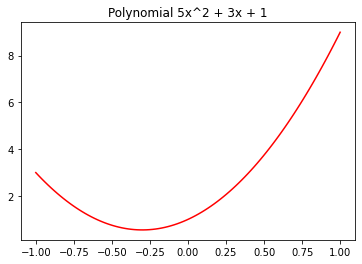

In [4]:
p = Polynomial(5,3,1)
plt.title("Polynomial 5x^2 + 3x + 1")
p.plot(color='red')



## Part B

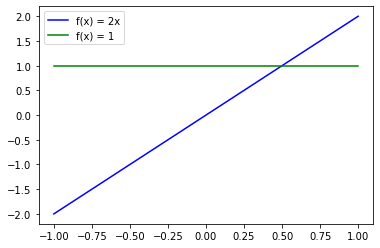

In [5]:
#part b
s = Scale(2)
s.plot(color = 'blue', label = "f(x) = 2x")
c = Constant(1)
c.plot(color = 'green', label = "f(x) = 1")
plt.legend()
plt.show()



## Part C

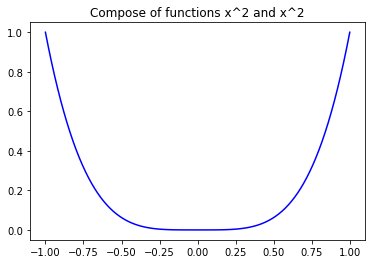

In [6]:
# part c
x = Compose(Polynomial(1,0,0), Polynomial(1,0,0))
plt.title("Compose of functions x^2 and x^2")
x.plot(color = 'blue')


## Part D

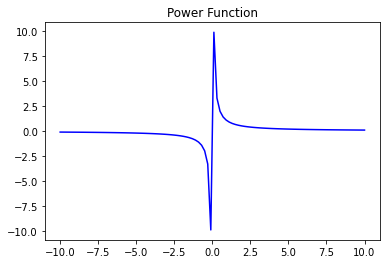

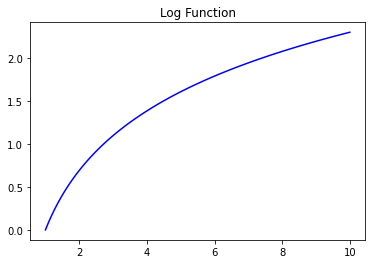

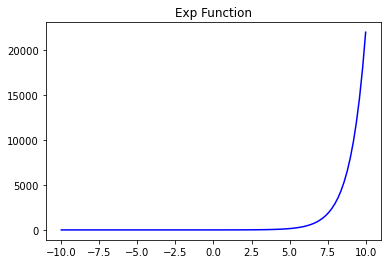

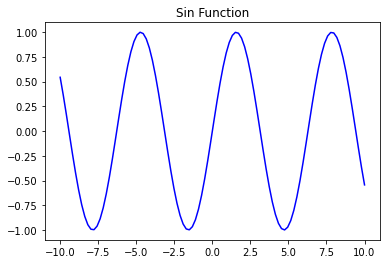

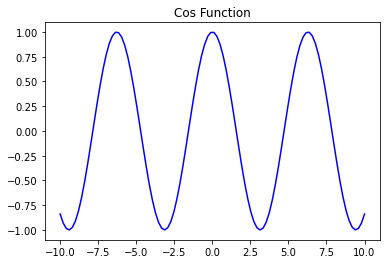

In [7]:
# part d
power = Power(-1);
power.plot(vals = np.linspace(-10,10,100),color = 'blue');
plt.title("Power Function");
plt.show();
    
log = Log();
log.plot(vals = np.linspace(1,10,100),color = 'blue');
plt.title("Log Function");
plt.show();

exp = Exponential()
exp.plot(vals = np.linspace(-10,10,100),color = 'blue');
plt.title("Exp Function");
plt.show();

sin = Sin()
sin.plot(vals = np.linspace(-10,10,100),color = 'blue');
plt.title("Sin Function");
plt.show();

cos = Cos()
cos.plot(vals = np.linspace(-10,10,100),color = 'blue');
plt.title("Cos Function");
plt.show();



## Part E

In [8]:
## Your code here
f = Symbolic('f')

In [9]:
str(f)

'f({0})'

In [10]:
f(5)

'f(5)'

In [11]:
f.derivative()

Symbolic("f'")

In [12]:
f = Symbolic('f')
g = Symbolic('g')
fg = Product(f,g)

print(fg)
print("The derivative of f(x)*g(x) is: {D}".format(D = fg.derivative()('x')))


f({0}) * g({0})
The derivative of f(x)*g(x) is: f'(x) * g(x) + f(x) * g'(x)


## Part F

1. What is the derivative of `5x^2 + 3x + 1`? 

In [13]:
from functions import Polynomial
P = Polynomial(5,3,1)
D = Polynomial.derivative(P)
print(D('x'))

10(x) + 3


2. Derive a rule for the derivative of $f = g/h$ using symbolic functions.  Does this reduce to quotient rule?

In [14]:
h = Symbolic('h')
g = Symbolic('g')
h_inv = Compose(Power(-1), h)
print(h_inv)
g_h = Product(g, h_inv)
deriv = g_h.derivative()
print(deriv('x'))
print("Yes, this reduces to the quotient rule")

()^-1(h({0}))
g'(x) * ()^-1(h(x)) + g(x) * -1 * ()^-2(h(x)) * h'(x)
Yes, this reduces to the quotient rule


3. What is the derivative of $\sin(x)^2$?

In [15]:
f = Sin()
g = Product(f, f)
h = Product.derivative(g)
print(h('x'))
#this is the correct answer, if not exactly in simplest form

cos(x) * sin(x) + sin(x) * cos(x)


4. What is the second derivative of $e^{5x}$?

In [16]:
e = Exponential()
f = Polynomial(5,0)
g = Compose(e, f)
h = Compose.derivative(g)
i = Product.derivative(h)
print(i('x'))#this is right but needs to get simplified

exp(x)(5(x)) * 5 * 5 + exp(x)(5(x)) * 0


# Problem 1

## Part A

Root of Sin(exp(x)) is at 1.1447298858494004.


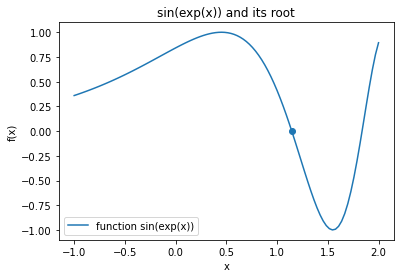

In [17]:
#Define the Sin(e^x) finction
sinExp = Sin()(Exponential());

# Find the root with newton_root function
sinExpRoot = newton_root(sinExp, 1.0);
print("Root of Sin(exp(x)) is at {root}.".format(root = sinExpRoot));

# Plot the sin(exp(x)) function and scatter the root found
vals = np.linspace(-1,2,100);
num = sinExp.evaluate(vals);

plt.plot(vals, num, label = "function sin(exp(x))");
plt.xlabel("x");
plt.ylabel("f(x)");
plt.title("sin(exp(x)) and its root");
plt.legend();
plt.scatter(sinExpRoot, sinExp(sinExpRoot));

plt.show();

## Part B

Extrema of Sin(exp(x)) is at x = 1.5501949943225588.


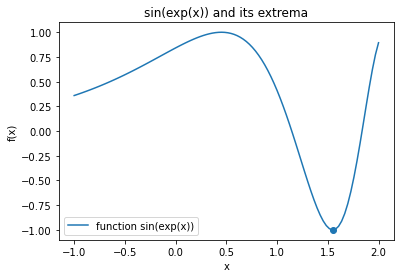

In [18]:
#Define the Sin(e^x) finction
sinExp = Sin()(Exponential());
sinExpExtrema = newton_extremum(sinExp, 0.0);
print("Extrema of Sin(exp(x)) is at x = {extrema}.".format(extrema = sinExpExtrema));

# Plot the sin(exp(x)) function and scatter the extremum found
plt.plot(vals, num, label = "function sin(exp(x))");
plt.xlabel("x");
plt.ylabel("f(x)");
plt.title("sin(exp(x)) and its extrema");
plt.legend();
plt.scatter(sinExpExtrema, sinExp(sinExpExtrema));

plt.show();

# Problem 2

## Part A

You don't need any code in this notebook - it goes in `functions.py`

## Part B

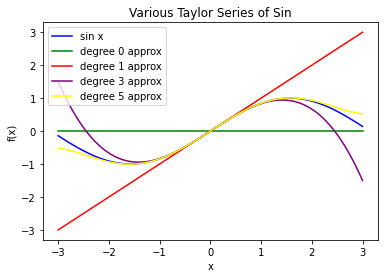

In [19]:
# Define and plot the Sin function
sin = Sin()
sin.plot(vals = np.linspace(-3,3,100),color = 'blue', label = 'sin x');

# Construct and plot degree 0 - 5 approximation functions
deg0 = AbstractFunction.taylor_series(sin, 0, 0)
deg0.plot(vals = np.linspace(-3,3,100), color = 'green', label = 'degree 0 approx')
deg1 = AbstractFunction.taylor_series(sin, 0, 1)
deg1.plot(vals = np.linspace(-3,3,100), color = 'red', label = 'degree 1 approx')
deg3 = AbstractFunction.taylor_series(sin, 0, 3)
deg3.plot(vals = np.linspace(-3,3,100), color = 'purple', label = 'degree 3 approx')
deg5 = AbstractFunction.taylor_series(sin, 0, 5)
deg5.plot(vals = np.linspace(-3,3,100), color = 'yellow', label = 'degree 5 approx')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Various Taylor Series of Sin");
plt.show()

# Feedback